<a href="https://colab.research.google.com/github/S3IFK/Practise/blob/main/SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
sms = pd.read_csv('/content/spam.csv', encoding='latin1')

In [3]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
sms.shape

(5572, 5)

##**DATA** CLEANING

In [6]:
sms.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
sms.rename(columns={'v1':'Target', 'v2': 'Text'},inplace=True)

In [9]:
sms.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
len(sms['Target'])

5572

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
enc = LabelEncoder()

In [13]:
sms['Target']=enc.fit_transform(sms['Target'])

In [14]:
sms.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
sms.isnull().sum()

Target    0
Text      0
dtype: int64

In [16]:
sms.duplicated().sum()

403

In [17]:
sms = sms.drop_duplicates(keep='first')

In [18]:
sms.duplicated().sum()

0

In [19]:
sms.shape

(5169, 2)

## **EDA**

In [20]:
sms['Target'].value_counts()

0    4516
1     653
Name: Target, dtype: int64

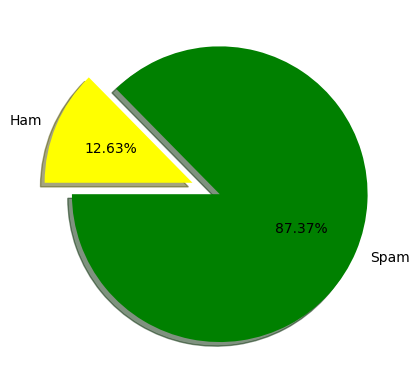

In [21]:
plt.pie(sms['Target'].value_counts(),labels=['Spam','Ham'],autopct='%0.2f%%',shadow=True,startangle=180,explode=(0,0.2),colors=['green','yellow'])
plt.show()

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
sms['Num_char'] = sms['Text'].apply(len)

In [25]:
sms.head()

,Target,Text,Num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
sms['Num_words'] = sms['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
sms.head()

,Target,Text,Num_char,Num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
sms['Num_sent'] = sms['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
sms.head()

,Target,Text,Num_char,Num_words,Num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
sms[['Num_char','Num_words','Num_sent']].describe()

,Num_char,Num_words,Num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
sms[sms['Target'] ==0][['Num_char','Num_words','Num_sent']].describe()

,Num_char,Num_words,Num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
sms[sms['Target'] ==1][['Num_char','Num_words','Num_sent']].describe()

,Num_char,Num_words,Num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns

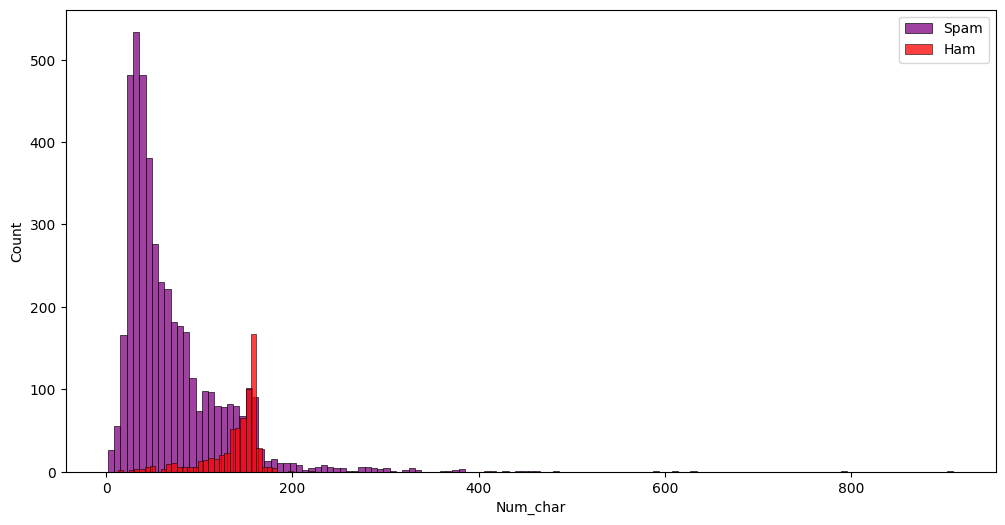

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(sms[sms['Target']==0]['Num_char'],color='purple')
sns.histplot(sms[sms['Target']==1]['Num_char'],color='red')
plt.legend(('Spam','Ham'))
plt.show()

<Figure size 1200x400 with 0 Axes>

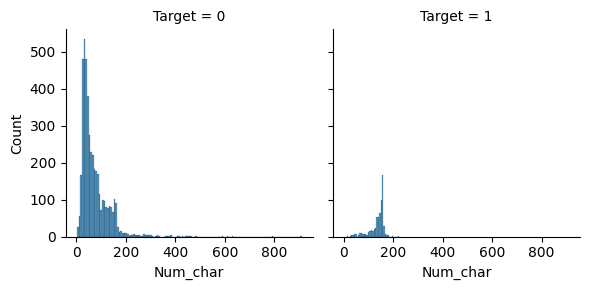

In [35]:
from matplotlib import colors
plt.figure(figsize=(12,4))
g = sns.FacetGrid(sms,col='Target')
g.map(sns.histplot,"Num_char")
plt.show()

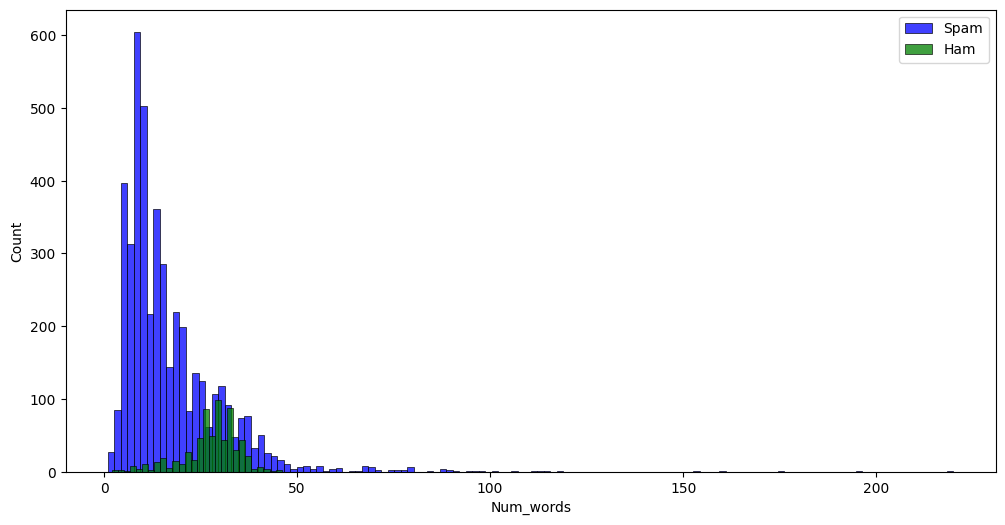

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(sms[sms['Target']==0]['Num_words'],color='blue')
sns.histplot(sms[sms['Target']==1]['Num_words'],color='green')
plt.legend(('Spam','Ham'))
plt.show()

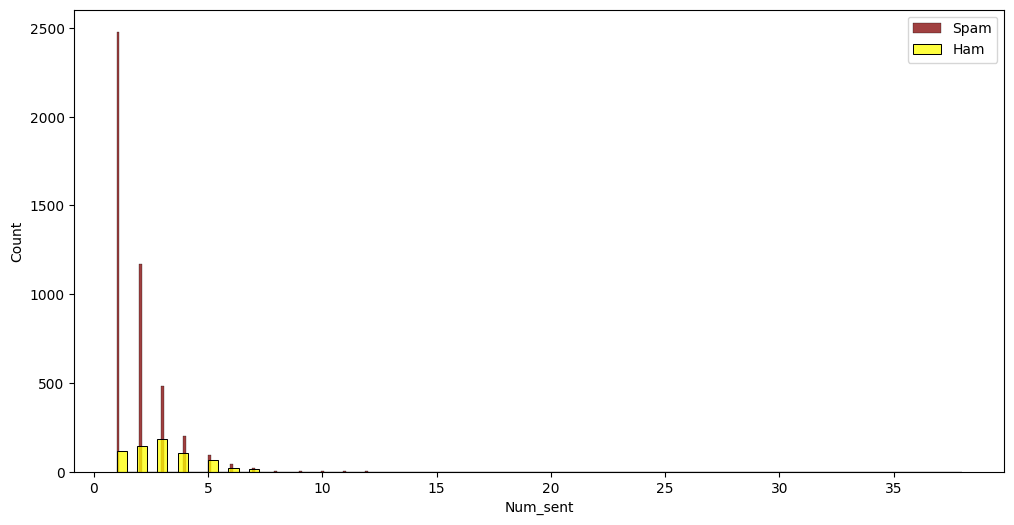

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(sms[sms['Target']==0]['Num_sent'],color='maroon')
sns.histplot(sms[sms['Target']==1]['Num_sent'],color='yellow')
plt.legend(('Spam','Ham'))
plt.show()

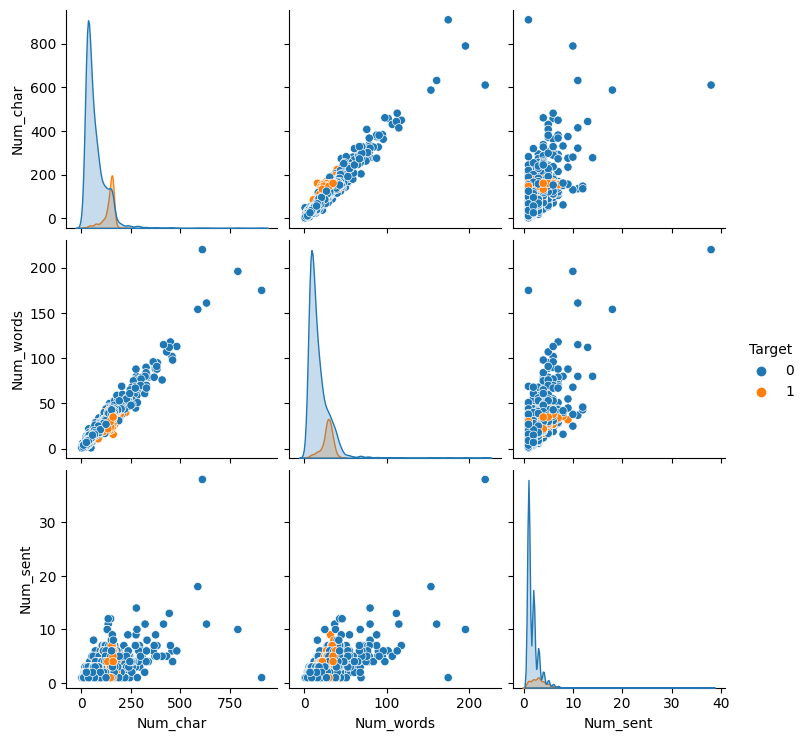

In [38]:
sns.pairplot(sms,hue='Target')

# **DATA PREPROCESSING**

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [40]:
from nltk.corpus import stopwords

In [41]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
def transform_tx(Text):
  Text = Text.lower()
  Text = nltk.word_tokenize(Text)

  y=[]
  for i in Text:
    if i.isalnum():
      y.append(i)

  Text = y[:]
  y.clear()

  for i in Text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  Text =y[:]
  y.clear()

  for i in Text:
    y.append(ps.stem(i))

  return " ".join(y)


In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [45]:
transform_tx('What are you doing with Google in the kick?')

'googl kick'

In [46]:
sms['Transformed_txt'] = sms['Text'].apply(transform_tx)

In [47]:
sms.head()

,Target,Text,Num_char,Num_words,Num_sent,Transformed_txt
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [49]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='red')

In [50]:
spam_wc = wc.generate(sms[sms['Target']==1]['Transformed_txt'].str.cat(sep=" "))

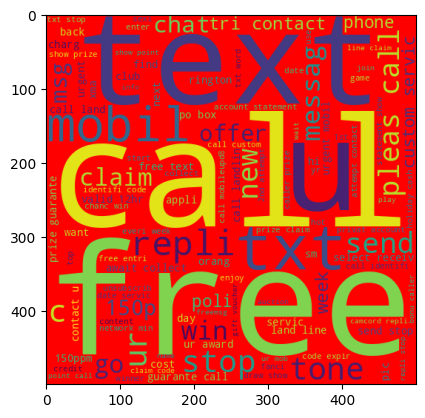

In [51]:
plt.imshow(spam_wc)

In [52]:
ham_wc = wc.generate(sms[sms['Target']==0]['Transformed_txt'].str.cat(sep=" "))

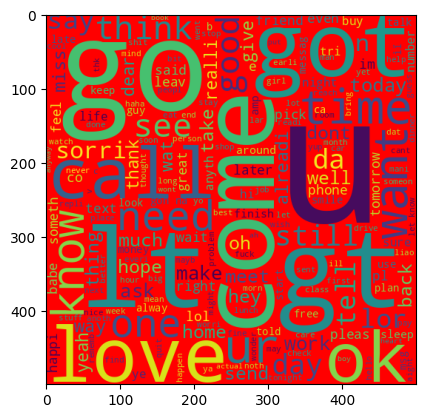

In [53]:
plt.imshow(ham_wc)

In [54]:
spam_cor = []
for msg in sms[sms['Target']==1]['Transformed_txt'].tolist():
  for word in msg.split():
    spam_cor.append(word)

In [56]:
len(spam_cor)

9939

In [68]:
from collections import Counter

In [69]:
pd.DataFrame(Counter(spam_cor).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


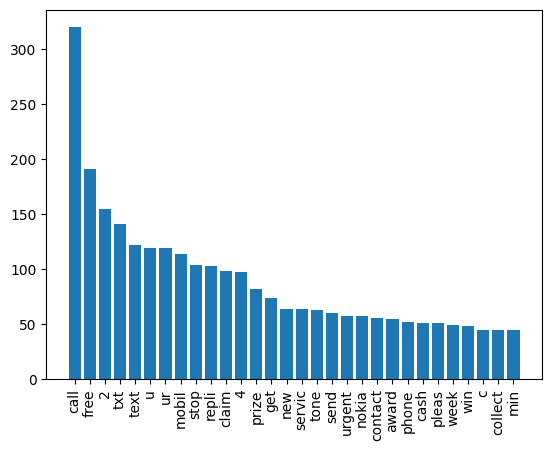

In [84]:
plt.bar(pd.DataFrame(Counter(spam_cor).most_common(30))[0],pd.DataFrame(Counter(spam_cor).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [85]:
ham_cor = []
for msg in sms[sms['Target']==0]['Transformed_txt'].tolist():
  for word in msg.split():
    ham_cor.append(word)

In [86]:
len(ham_cor)

35404

In [87]:
pd.DataFrame(Counter(ham_cor).most_common(30))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


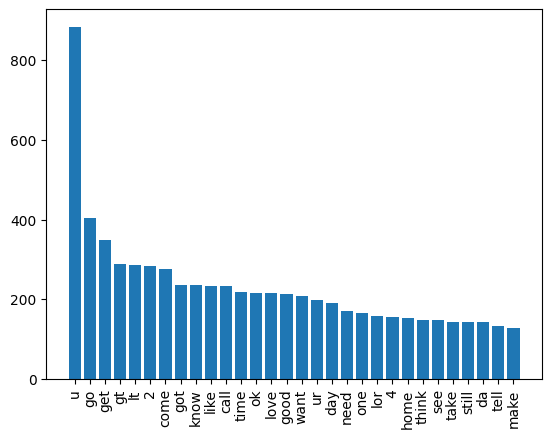

In [88]:
plt.bar(pd.DataFrame(Counter(ham_cor).most_common(30))[0],pd.DataFrame(Counter(ham_cor).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

###**MODEL BUILDING**

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [90]:
X = cv.fit_transform(sms['Transformed_txt']).toarray()

In [91]:
X.shape

(5169, 6708)

In [92]:
y = sms['Target'].values

In [93]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [97]:
gc = GaussianNB()
mc = MultinomialNB()
bc = BernoulliNB()

In [98]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [99]:
gc.fit(X_train,y_train)
y_pred1 = gc.predict(X_test)

In [100]:
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [101]:
mc.fit(X_train,y_train)
y_pred2 = mc.predict(X_test)

In [102]:
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [103]:
bc.fit(X_train,y_train)
y_pred3 = bc.predict(X_test)

In [104]:
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [106]:
X = tf.fit_transform(sms['Transformed_txt']).toarray()

In [107]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [108]:
gc.fit(X_train,y_train)
y_predt = gc.predict(X_test)

In [109]:
print(accuracy_score(y_test,y_predt))
print(confusion_matrix(y_test,y_predt))
print(precision_score(y_test,y_predt))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [110]:
mc.fit(X_train,y_train)
y_predtm = mc.predict(X_test)

In [111]:
print(accuracy_score(y_test,y_predtm))
print(confusion_matrix(y_test,y_predtm))
print(precision_score(y_test,y_predtm))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [114]:
bc.fit(X_train,y_train)
y_predtb = bc.predict(X_test)

In [115]:
print(accuracy_score(y_test,y_predtb))
print(confusion_matrix(y_test,y_predtb))
print(precision_score(y_test,y_predtb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [193]:
sv = SVC(kernel='sigmoid', gamma=1.0,probability=True)
kn = KNeighborsClassifier()
dc = DecisionTreeClassifier(max_depth=5)
lg = LogisticRegression(solver='liblinear', penalty='l1')
rf = RandomForestClassifier(n_estimators=50,random_state=2)
ab = AdaBoostClassifier(n_estimators=50,random_state=2)
bg = BaggingClassifier(n_estimators=50,random_state=2)
et = ExtraTreesClassifier(n_estimators=50,random_state=2)
gd = GradientBoostingClassifier(n_estimators=50,random_state=2)
xg = XGBClassifier(n_estimators=50,random_state=2)

In [194]:
clfs = {
    'SVC':sv, 'KN':kn, 'DC': dc, 'MC':mc, 'LG':lg, 'RF':rf, 'ADB':ab, 'BGC':bg, 'EXT':et, 'GDB':gd, 'XGB':xg}

In [195]:
def train_classifiers(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_predc = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_predc)
  precision = precision_score(y_test,y_predc)

  return accuracy, precision

In [196]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifiers(clf,X_train,y_train,X_test,y_test)

  print("For ", name)
  print("Acuuracy - ",current_accuracy)
  print("Precision - ",current_precision)


  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Acuuracy -  0.9758220502901354
Precision -  0.9669421487603306
For  KN
Acuuracy -  0.9081237911025145
Precision -  1.0
For  DC
Acuuracy -  0.9342359767891683
Precision -  0.8365384615384616
For  MC
Acuuracy -  0.97678916827853
Precision -  1.0
For  LG
Acuuracy -  0.9574468085106383
Precision -  0.9607843137254902
For  RF
Acuuracy -  0.9748549323017408
Precision -  0.9666666666666667
For  ADB
Acuuracy -  0.9613152804642167
Precision -  0.9537037037037037
For  BGC
Acuuracy -  0.9564796905222437
Precision -  0.849624060150376
For  EXT
Acuuracy -  0.9777562862669246
Precision -  0.9752066115702479
For  GDB
Acuuracy -  0.9526112185686654
Precision -  0.9320388349514563
For  XGB
Acuuracy -  0.9690522243713733
Precision -  0.9568965517241379


In [197]:
pef_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [198]:
pef_df

,Algorithm,Accuracy,Precision
1,KN,0.908124,1.000000
3,MC,0.976789,1.000000
8,EXT,0.977756,0.975207
0,SVC,0.975822,0.966942
5,RF,0.974855,0.966667
4,LG,0.957447,0.960784
10,XGB,0.969052,0.956897
6,ADB,0.961315,0.953704
9,GDB,0.952611,0.932039
7,BGC,0.956480,0.849624


In [199]:
pef_df1 = pd.melt(pef_df,id_vars = 'Algorithm')

In [200]:
pef_df1

,Algorithm,variable,value
0,KN,Accuracy,0.908124
1,MC,Accuracy,0.976789
2,EXT,Accuracy,0.977756
3,SVC,Accuracy,0.975822
4,RF,Accuracy,0.974855
5,LG,Accuracy,0.957447
6,XGB,Accuracy,0.969052
7,ADB,Accuracy,0.961315
8,GDB,Accuracy,0.952611
9,BGC,Accuracy,0.956480


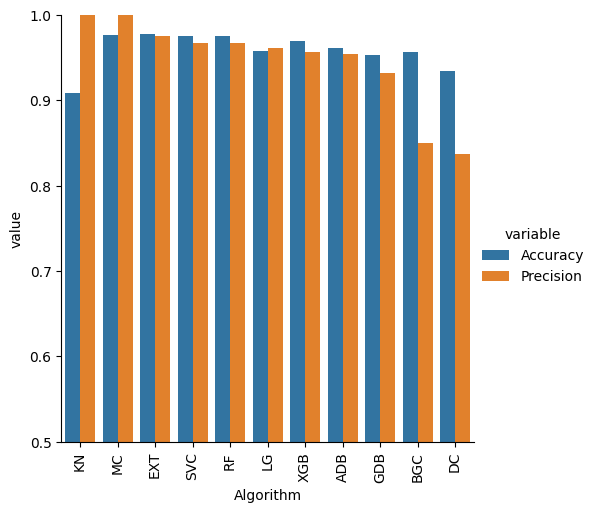

In [201]:
sns.catplot(x ='Algorithm', y='value', hue= 'variable', data=pef_df1, kind='bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [202]:
tf3 = TfidfVectorizer(max_features=2000)

In [203]:
X = tf3.fit_transform(sms['Transformed_txt']).toarray()

In [204]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [206]:
def train_classifiers(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred3k = clf.predict(X_test)
  accuracy3 = accuracy_score(y_test,y_pred3k)
  precision3 = precision_score(y_test,y_pred3k)

  return accuracy3, precision3

In [207]:
accuracy_scoresft3k = []
precision_scoresft3k = []

for name, clf in clfs.items():
  current_accuracy, current_precision = train_classifiers(clf,X_train,y_train,X_test,y_test)

  print("For ", name)
  print("Acuuracy3k - ",current_accuracy)
  print("Precision3k - ",current_precision)


  accuracy_scoresft3k.append(current_accuracy)
  precision_scoresft3k.append(current_precision)

For  SVC
Acuuracy3k -  0.9758220502901354
Precision3k -  0.9669421487603306
For  KN
Acuuracy3k -  0.9081237911025145
Precision3k -  1.0
For  DC
Acuuracy3k -  0.9332688588007737
Precision3k -  0.8285714285714286
For  MC
Acuuracy3k -  0.97678916827853
Precision3k -  1.0
For  LG
Acuuracy3k -  0.9574468085106383
Precision3k -  0.9607843137254902
For  RF
Acuuracy3k -  0.9748549323017408
Precision3k -  0.9666666666666667
For  ADB
Acuuracy3k -  0.9613152804642167
Precision3k -  0.9537037037037037
For  BGC
Acuuracy3k -  0.9564796905222437
Precision3k -  0.849624060150376
For  EXT
Acuuracy3k -  0.9777562862669246
Precision3k -  0.9752066115702479
For  GDB
Acuuracy3k -  0.9526112185686654
Precision3k -  0.9320388349514563
For  XGB
Acuuracy3k -  0.9690522243713733
Precision3k -  0.9568965517241379


In [208]:
tem_df = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy3k': accuracy_scoresft3k, 'Precision3k': precision_scoresft3k}).sort_values('Precision3k', ascending=False)

In [209]:
tem_df

,Algorithm,Accuracy3k,Precision3k
1,KN,0.908124,1.000000
3,MC,0.976789,1.000000
8,EXT,0.977756,0.975207
0,SVC,0.975822,0.966942
5,RF,0.974855,0.966667
4,LG,0.957447,0.960784
10,XGB,0.969052,0.956897
6,ADB,0.961315,0.953704
9,GDB,0.952611,0.932039
7,BGC,0.956480,0.849624


In [210]:
pef_df.merge(tem_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy3k,Precision3k
0,KN,0.908124,1.000000,0.908124,1.000000
1,MC,0.976789,1.000000,0.976789,1.000000
2,EXT,0.977756,0.975207,0.977756,0.975207
3,SVC,0.975822,0.966942,0.975822,0.966942
4,RF,0.974855,0.966667,0.974855,0.966667
5,LG,0.957447,0.960784,0.957447,0.960784
6,XGB,0.969052,0.956897,0.969052,0.956897
7,ADB,0.961315,0.953704,0.961315,0.953704
8,GDB,0.952611,0.932039,0.952611,0.932039
9,BGC,0.956480,0.849624,0.956480,0.849624


In [211]:
from sklearn.ensemble import VotingClassifier
vot = VotingClassifier(estimators=[('SVM', sv), ('NBMC', mc), ('EXTC', et)],voting='soft')

In [212]:
vot.fit(X_train,y_train)

VotingClassifier(estimators=[('SVM',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('NBMC', MultinomialNB()),
                             ('EXTC',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [213]:
y_predvt = vot.predict(X_test)

In [214]:
print('Accuracyvt',accuracy_score(y_test,y_predvt))
print('Precisionvt',precision_score(y_test,y_predvt))

Accuracyvt 0.9796905222437138
Precisionvt 0.9834710743801653


In [215]:
estimators=[('SVM', sv), ('NBMC', mc), ('EXTC', et)]
final_estimator= RandomForestClassifier()

In [216]:
from sklearn.ensemble import StackingClassifier

In [217]:
stck = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [218]:
stck.fit(X_train,y_train)

StackingClassifier(estimators=[('SVM',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('NBMC', MultinomialNB()),
                               ('EXTC',
                                ExtraTreesClassifier(n_estimators=50,
                                                     random_state=2))],
                   final_estimator=RandomForestClassifier())

In [219]:
y_predstk = stck.predict(X_test)

In [220]:
print('Accuracystk', accuracy_score(y_test,y_predstk))
print('Precisionstk', precision_score(y_test,y_predstk))

Accuracystk 0.9806576402321083
Precisionstk 0.9538461538461539


In [221]:
import pickle

In [223]:
pickle.dump(tf3,open('vectorizer.pkl','wb'))
pickle.dump(mc,open('model.pkl','wb'))